In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

import os, pickle, re, glob, time
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from scipy import stats
from collections import Counter

sns.set_style('ticks')
pd.set_option('precision', 2)
#np.set_printoptions('precision', 2)

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from lib import utils

In [3]:
args = pickle.load(open('arguments.pickle', 'rb'))

# นับจำนวน ATGC แต่ละตำแหน่ง เพื่อหา entropy

In [4]:
align_array_df = pickle.load(open(os.path.join(args.preprocess_dir, "align_array_df.pickle"), "rb"))

In [5]:
align_array_df.shape

(3406, 29903)

In [6]:
count_df = align_array_df.apply(pd.value_counts).fillna(0).astype(int)

In [7]:
count_df

,0,1,2,3,4,5,6,7,8,9,...,29893,29894,29895,29896,29897,29898,29899,29900,29901,29902
,3338,3303,3161,3078,2785,2698,2653,2614,2540,2496,...,3406,3406,3406,3406,3406,3406,3406,3406,3406,3406
-,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A,68,0,0,328,621,708,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,753,792,0,0,...,0,0,0,0,0,0,0,0,0,0
K,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
count_align_df = count_df.T[["A", "T", "C", 'G']]

In [9]:
#หา entropy
from scipy.stats import entropy
count_align_df['entropy'] = entropy(count_align_df,axis =1)
count_align_df.head()

,A,T,C,G,entropy
0,68,0,0,0,0.0
1,0,103,0,0,0.0
2,0,245,0,0,0.0
3,328,0,0,0,0.0
4,621,0,0,0,0.0


In [10]:
count_align_df.to_csv(os.path.join(args.preprocess_dir, 'count_align_df.csv'), index=False)

# หาตำแหน่ง entropy ที่มากสุด

In [14]:
clade_data = pd.read_csv(args.predefined_clade, sep='\t')

In [16]:
clade_dict = clade_data.set_index('Clade').T.to_dict('list')

#delete nan
for k in clade_dict.keys():
    clade_dict[k] = [x for x in clade_dict[k] if str(x) != 'nan']

In [17]:
original_pos_list = set()
original_pos_list = original_pos_list.union([int(p[1:])-1 for p in clade_dict['L']])

original_pos_list

{240, 3036, 8781, 11082, 22226, 23062, 23402, 25562, 26143, 28143, 28881}

In [18]:
count_align_df.loc[original_pos_list]['entropy']

23402    0.64
11082    0.62
8781     0.07
28143    0.04
240      0.64
28881    0.39
22226    0.20
23062    0.36
25562    0.44
3036     0.64
26143    0.05
Name: entropy, dtype: float64

In [19]:
count_align_df.sort_values('entropy',ascending=False).head(50)

,A,T,C,G,entropy
28880,456,1073,0,1877,0.96
23603,203,1,2034,1164,0.85
6311,949,102,2352,0,0.72
26766,0,2344,1028,33,0.66
240,0,2219,1144,0,0.64
3036,0,2256,1149,0,0.64
14407,0,2255,1148,0,0.64
23402,1148,0,0,2258,0.64
21986,1051,1,3,2318,0.63
29401,0,1084,0,2309,0.63


In [20]:
x=count_align_df['entropy'].values
x[x>0]

array([0.02, 0.01, 0.02, ..., 0.04, 0.02, 0.02])

<AxesSubplot:ylabel='Density'>

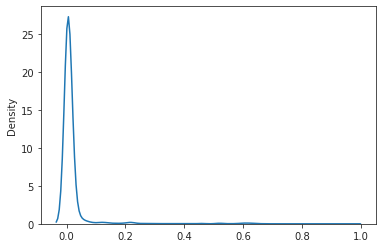

In [21]:
sns.distplot(x[x>0],hist=False)

In [22]:
max_etp_pos = count_align_df.sort_values('entropy',ascending=False).head(50).index
len(max_etp_pos)

50

In [23]:
#รวมกับ reference ด้วย
max_etp_pos = original_pos_list.union(set(max_etp_pos))
len(max_etp_pos)

54

In [24]:
max_etp_pos = ['{}'.format(x) for x in max_etp_pos] #ตำแหน่งน้อยกว่าตำแหน่งจริง 1 ตำแหน่่ง

In [25]:
pickle.dump(max_etp_pos, open(os.path.join(args.preprocess_dir, 'max_etp_pos.pickle'), 'wb'))